In [246]:
import numpy as np
import matplotlib.pyplot as plt

Reading in and plotting the data

Text(0, 0.5, 'd')

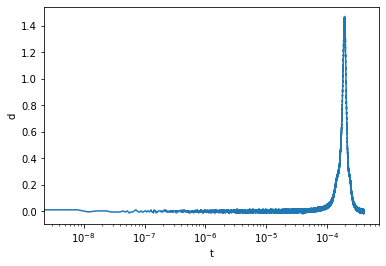

In [247]:
stuff=np.load('sidebands.npz')
t=stuff['time']
d=stuff['signal']
plt.plot(t,d)
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('d')

## a)

From the plot, guessing the initial parameters as: t0 = 2x10$^{-4}$, a = 1.4, w = 2x10$^{-4}$

Function to give the predicted data based on the guess of the parameters and also return A'. The array p conatins the parameters in the order [a, t0, w]

In [248]:
def calc_lorentz(p,t):
    y=p[0]/(1+(t-p[1])**2/p[2]**2)
    grad=np.zeros([t.size,p.size])
    #now partial differentiate w.r.t. all the parameters
    grad[:,0]=1.0/(1+(t-p[1])**2/p[2]**2)
    grad[:,1]=(2*p[0]*(t-p[1]))/((1+(t-p[1])**2/p[2]**2)**2*p[2]**2)
    grad[:,2]=(2*p[0]*(t-p[1])**2)/((1+(t-p[1])**2/p[2]**2)**2*p[2]**3)
    return y,grad

Starting with an initial guess of the parmeters. The function calc_lorentz returns the predicted data based on p, and the matrix A'. Then as derived in class $\delta\chi^2$ = $-2A'^TN^{-1}r$, but I am considering $N^{-1}$ to be I. Since we want $\delta\chi^2$ to be 0, I set the convergence criteria so that the loop will run until $\delta\chi^2$ is greater than $10^{-3}$. As we derived in class, the step dp will be $(A'^TA')^{-1}(A'^Tr)$

Best-fit parameters for amplitude = 1.4228106806321144, center = 0.00019235864937565183, width = -1.792369079401583e-05


Text(0, 0.5, 'd')

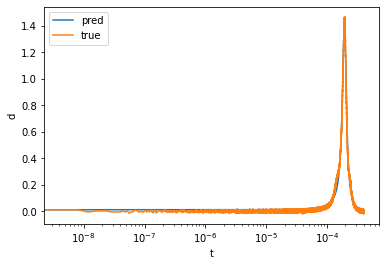

In [249]:
p0=np.array([1.4, 2*pow(10,-4), 2*pow(10,-4)]) 

p=p0.copy()
flag = True
while flag:
    pred,grad=calc_lorentz(p,t)
    r=d-pred
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)
    delta_chi2 = np.array(-2*grad.transpose()*r)
    flag = False
    for i in range(len(delta_chi2)):
        if abs(delta_chi2[i][0]) > pow(10,-3):
            flag = True
            break
    if flag == True:
        lhs=grad.transpose()*grad
        rhs=grad.transpose()*r
        dp=np.linalg.inv(lhs)*(rhs)
        for jj in range(p.size):
            p[jj]=p[jj]+dp[jj]
print("Best-fit parameters for amplitude = {}, center = {}, width = {}".format(p[0], p[1], p[2]))
plt.plot(t,pred,label="pred")
plt.plot(t,d,label="true")
plt.legend()
plt.xscale('log')
plt.xlabel("t")
plt.ylabel("d")
plt.xlabel("t")
plt.ylabel("d")

## b)

Estimating the noise (or variance) to be the mean of the residual squared. Then, the error in the parameters would be the square root of the diagonal elemets of the covariance matrix $(A'^TN^{-1}A')^{-1}$. 

In [250]:
A = np.zeros([len(t)])
A = p[0]/(1+(t-p[1])**2/p[2]**2)
N=np.mean((d-pred)**2)
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs)))
print("Best-fit parameter error for amplitude = {}, center = {}, width = {}".format(par_errs[0], par_errs[1], par_errs[2]))

Best-fit parameter error for amplitude = 0.00042547904587075835, center = 5.358345563332885e-09, width = 7.588097244743478e-09


## c)

Function to return partial derivative wrt the parameters. I am taking the dx in the partial derivative to be the value of the model parameter divided by 100. 

In [251]:
def part_diff(fun, pars, t):
    pred = fun(pars, t)
    grad = np.zeros([t.size, pars.size])
    for i in range(len(pars)):
        pars_temp1 = pars.copy()
        pars_temp2 = pars.copy()
        h = pars[i]/pow(10, 2)
        #print(h)
        pars_temp1[i] = pars_temp1[i] + h
        pars_temp2[i] = pars_temp2[i] - h
        #print(pars_temp1, pars_temp2)
        grad[:,i] = (fun(pars_temp1, t) - fun(pars_temp2, t))/(2*h)
    return pred, grad

Function which returns the Lorentzian

In [252]:
def fun(p, t):
    y = p[0]/(1+(t-p[1])**2/p[2]**2)
    return np.array(y)

Plotting the predicted data from the initial guess of the parameters

Text(0, 0.5, 'd')

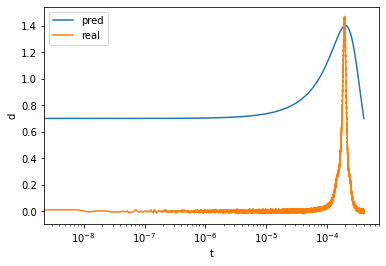

In [253]:
p0 = np.array([1.4, 2*pow(10,-4), 2*pow(10,-4)])
pred, grad = part_diff(fun, p0, t)
plt.plot(t, pred, label = "pred")
plt.plot(t, d, label = "real")
plt.legend()
plt.xscale("log")
plt.xlabel("t")
plt.ylabel("d")

Doing the same thing as in a) but with the numerical partial derivative function. 

Best-fit parameters for amplitude = 1.4228001045462348, center = 0.000192354414007016, width = -1.7923957040798062e-05


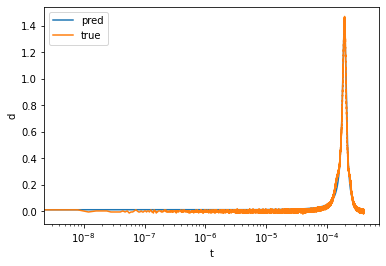

In [254]:
p0 = np.array([1.4, 2*pow(10,-4), 2*pow(10,-4)])
p=p0.copy()
flag = True
while flag:
    #pred = fun(p, t)
    pred, grad = part_diff(fun, p, t)
    r=d-pred
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)
    delta_chi2 = np.array(-2*grad.transpose()*r)
    flag = False
    for i in range(len(delta_chi2)):
        if abs(delta_chi2[i][0]) > pow(10,-3):
            flag = True
            break
    if flag == True:
        lhs=grad.transpose()*grad
        rhs=grad.transpose()*r
        dp=np.linalg.pinv(lhs)*(rhs)
        for jj in range(p.size):
            p[jj]=p[jj]+dp[jj]
plt.plot(t,pred,label="pred")
plt.plot(t,d,label="true")
plt.legend()
plt.xscale('log')
plt.xlabel("t")
plt.ylabel("d")
print("Best-fit parameters for amplitude = {}, center = {}, width = {}".format(p[0], p[1], p[2]))

In [255]:
N=np.mean((d-pred)**2)
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs)))
print("Best-fit parameter error for amplitude = {}, center = {}, width = {}".format(par_errs[0], par_errs[1], par_errs[2]))

Best-fit parameter error for amplitude = 0.00042548791051056197, center = 5.389210767860868e-09, width = 7.588424876129845e-09


The best-fit parameters are not statistically significantly different from my answers in a)

## d)

Defining the new model function with the array p having the parameters in the order [a, b, c, t0, dt, w] and doing the same thing as in c)

In [256]:
# p = [a, b, c, t0, dt, w]
def fun2(p, t):
    y = p[0]/(1+(t-p[3])**2/p[5]**2) + p[1]/(1+(t-p[3]+p[4])**2/p[5]**2) + p[2]/(1+(t-p[3]-p[4])**2/p[5]**2)
    return np.array(y)

For the initial parameters, using the best-fit values for a, t0 and w

Best-fit parameters for a = 1.4429874309196413, b = 0.10382365393961594, c = 0.06478930144874528, t0 = 0.0001925742772637443, dt = 4.457048006014769e-05, w = -1.6065574718923747e-05


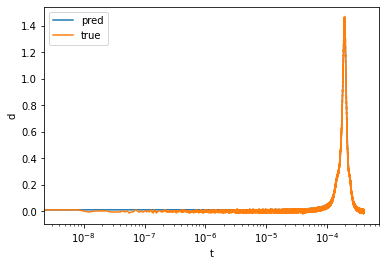

In [257]:
p0 = np.array([1.42281068e+00, 0.3, 0.3, 1.92358649e-04, 0.5*pow(10, -4), -1.79236908e-05])
p=p0.copy()
flag = True
while flag:
    #pred = fun(p, t)
    pred, grad = part_diff(fun2, p, t)
    r=d-pred
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)
    delta_chi2 = np.array(-2*grad.transpose()*r)
    flag = False
    for i in range(len(delta_chi2)):
        if abs(delta_chi2[i][0]) > pow(10,-3):
            flag = True
            break
    if flag == True:
        lhs=grad.transpose()*grad
        rhs=grad.transpose()*r
        dp=np.linalg.pinv(lhs)*(rhs)
        for jj in range(p.size):
            p[jj]=p[jj]+dp[jj]
plt.plot(t,pred,label="pred")
plt.plot(t,d,label="true")
plt.legend()
plt.xscale('log')
plt.xlabel("t")
plt.ylabel("d")
print("Best-fit parameters for a = {}, b = {}, c = {}, t0 = {}, dt = {}, w = {}".format(p[0], p[1], p[2], p[3], p[4], p[5]))

In [258]:
N=np.mean((d-pred)**2)
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs)))
print("Best-fit parameter errors for a = {}, b = {}, c = {}, t0 = {}, dt = {}, w = {}".format(par_errs[0], par_errs[1], par_errs[2], par_errs[3], par_errs[4], par_errs[5]))

Best-fit parameter errors for a = 0.0002664341483535688, b = 0.0002542262998720864, c = 0.0002489206549916085, t0 = 3.1820022608659255e-09, dt = 3.8060597997087904e-08, w = 5.649755024223123e-09


## e)

Text(0.5, 0, '')

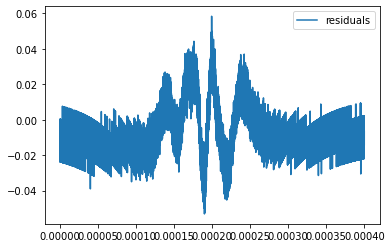

In [259]:
plt.plot(t, d-pred, label="residuals")
plt.legend()
plt.xlabel("")

As can be seen, there is structure in the residuals similar to the shape of the data. This means that the model doesn't fully describe the data. Also, since the residuals are not randomly distributed, we cannot say that the data are independent with uniform variance

## f)

Getting the full covariance matrix for the error in parameters. 

In [260]:
N=np.mean((d-pred)**2)
cov=N*(np.linalg.inv(lhs))

Best-fit chi2 is 21.24764880700172
Difference between chi2 of perturbed parameters and best fit parameters is -0.0008390271231029089
Difference between chi2 of perturbed parameters and best fit parameters is -0.0004614266868046002
Difference between chi2 of perturbed parameters and best fit parameters is -0.0012930806570068398
Difference between chi2 of perturbed parameters and best fit parameters is -0.0004808083884810799
Difference between chi2 of perturbed parameters and best fit parameters is -0.0010911768097656704
Difference between chi2 of perturbed parameters and best fit parameters is -0.0018797208579890423
Difference between chi2 of perturbed parameters and best fit parameters is -0.0021407538847029173
Difference between chi2 of perturbed parameters and best fit parameters is -0.001960489806219101
Difference between chi2 of perturbed parameters and best fit parameters is -0.002272234317558741
Difference between chi2 of perturbed parameters and best fit parameters is -0.0002908

Text(0, 0.5, 'd')

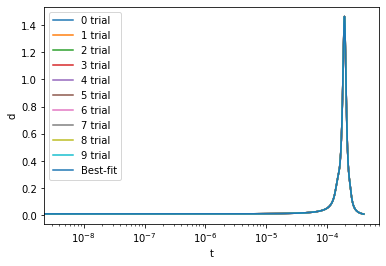

In [261]:
bestfit_chi2 = np.sum((d - fun2(p,t))**2)
print("Best-fit chi2 is {}".format(bestfit_chi2))
for i in range(10):
    p_new = np.random.multivariate_normal(p, cov)
    pred_new = fun2(p_new, t)
    plt.plot(t, pred_new, label=str(i)+" trial")
    chi2 = np.sum((d-pred_new)**2)
    print("Difference between chi2 of perturbed parameters and best fit parameters is {}".format(bestfit_chi2 - chi2))
plt.plot(t, fun2(p, t), label="Best-fit")
plt.legend()
plt.xscale("log")
plt.xlabel("t")
plt.ylabel("d")

As can be seen, the $\chi^2_{best-fit}$ - $\chi^2_{perturbed}$ is -ve for all the iterations. This makes sense as we want our best-fit parameters to have as less of a $\chi^2$ as possible.

## g)

Function which returns the $\chi^2$ (considering noise matrix N to to I)

In [264]:
def get_chi2(p, data):
    x=data['x']
    y=data['y']

    pred=fun2(p,x)
    chisq=np.sum((pred-y)**2)
    return chisq

Function which gives the offset in the parameters (dp) from a normal distribution having the varaiance as the covariance matrix of the error in model parameters. Multiplying this offset by 0.5 to have the convergence faster.

In [265]:
def get_step(p, cov):
    mean = np.zeros([len(p)])
    dp = np.random.multivariate_normal(mean, cov)*0.5
    return dp

The MCMC chain which startes with the best-fit parameters I got from d. Then, it adds an offset dp to p and calculates the $\chi^2$ for the new p. The probability of acceptance of the new p is higher is the new $\chi^2$ is lower. The p and $\chi^2$ for each step is saved. 

In [266]:
def run_chain(fun,pars,cov,data,nstep=40000,T=1):
    npar=len(pars)
    chain=np.zeros([nstep,npar])
    chisq=np.zeros(nstep)
    chain[0,:]=pars
    chi_cur=fun(pars,data)
    chisq[0]=chi_cur
    for i in range(1,nstep):
        pp=pars+get_step(pars, cov)
        new_chisq=fun(pp,data)
        accept_prob=np.exp(-0.5*(new_chisq-chi_cur)/T)
        if np.random.rand(1)<accept_prob:
            pars=pp
            chi_cur=new_chisq
        chain[i,:]=pars
        chisq[i]=chi_cur
    return chain,chisq

With the p and $\chi^2$ saved for all the steps, the final p would be the weighted avg of the p for all steps. The weight is the difference between the $\chi^2$ of a step from the minimum $\chi^2$. The p with less difference (and hence less $\chi^2$) has more weight. Similarly, the variance in p is calculated. (Here I am taking T=1, so the weight for all the steps is same)

In [267]:
def process_chain(chain,chisq,T=1.0):
    dchi=chisq-np.min(chisq)
    wt=np.exp(-0.5*dchi*(1-1/T)) 
    npar=chain.shape[1]
    tot=np.zeros(npar)
    totsqr=np.zeros(npar)
    for i in range(npar):
        tot[i]=np.sum(wt*chain[:,i])
        totsqr[i]=np.sum(wt*chain[:,i]**2)
    #divide by sum or weights
    mean=tot/np.sum(wt)
    meansqr=totsqr/np.sum(wt)

    #variance is <x^2>-<x>^2
    var=meansqr-mean**2
    return mean,np.sqrt(var),wt

In [268]:
data={}
data['x']=t
data['y']=d
chain,chivec=run_chain(get_chi2,p,cov,data)

mean,errs,wts=process_chain(chain,chivec)

Text(0.5, 1.0, 'Variation in the parameter a with the MCMC steps')

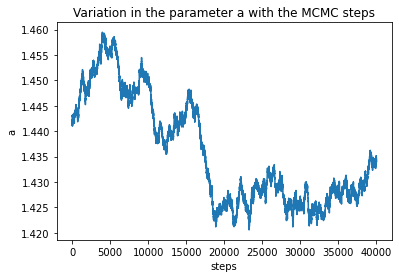

In [269]:
steps = 1 + np.arange(40000)
plt.plot(steps, chain[:,0])
plt.xlabel("steps")
plt.ylabel("a")
plt.title("Variation in the parameter a with the MCMC steps")

In [270]:
print("Best-fit parameters for a = {}, b = {}, c = {}, t0 = {}, dt = {}, w = {}".format(mean[0], mean[1], mean[2], mean[3], mean[4], mean[5]))
#print("Best-fit parameter errors for a = {}, b = {}, c = {}, t0 = {}, dt = {}, w = {}".format(errs[0], errs[1], errs[2], errs[3], errs[4], errs[5]))

Best-fit parameters for a = 1.4358313039601938, b = 0.10437690803596947, c = 0.04999674907790118, t0 = 0.00019273171650887786, dt = 4.721992715952323e-05, w = -1.6210301457627292e-05


In [271]:
pred, grad = part_diff(fun2, mean, t)
N=np.mean((d-pred)**2)
grad = np.matrix(grad)
lhs = grad.transpose()*grad
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs)))
print("Best-fit parameter errors for a = {}, b = {}, c = {}, t0 = {}, dt = {}, w = {}".format(par_errs[0], par_errs[1], par_errs[2], par_errs[3], par_errs[4], par_errs[5]))

Best-fit parameter errors for a = 0.0002815938609723725, b = 0.0002586869177527817, c = 0.00025196544845925204, t0 = 3.371114798420097e-09, dt = 4.2263460452428594e-08, w = 5.838623018827503e-09


The errors in the parameters are the same order as before

Text(0, 0.5, 'd')

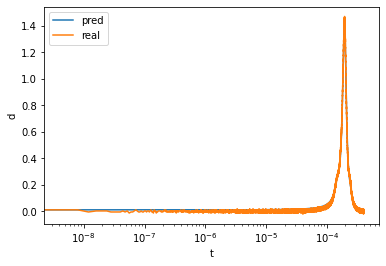

In [272]:
plt.plot(t, pred, label="pred")
plt.plot(t, d, label="real")
plt.legend()
plt.xscale("log")
plt.xlabel("t")
plt.ylabel("d")

## h)

Since dt corresponds to 9 GHz, scaling w accordingly to get the width in GHz

In [273]:
dt = mean[4]
w = mean[5]
width_cavity = np.abs(w)*9/dt
print("Width of the cavity is {} GHz".format(width_cavity))

Width of the cavity is 3.0896429091424857 GHz
